In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
data = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
data = data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099091,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216751,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198898,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [6]:
data_train = data[data['Date'] < '2023-07-31']
data_test = data[data['Date'] >= '2023-07-31']

In [8]:
data_prophet_train = data_train[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data_prophet_train

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [9]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='US')
model.fit(data_prophet_train)


14:57:22 - cmdstanpy - INFO - Chain [1] start processing
14:57:23 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=150)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.387503,155.996684,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,144.904234,155.820868,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.134007,154.762677,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.822534,154.279410,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,143.780092,154.741787,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,142.340035,165.813161,138.931437,159.827337,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,143.420385,166.072305,138.753595,159.865011,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,142.017155,165.575187,138.637101,159.902685,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,141.358989,165.542694,138.388058,159.944604,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


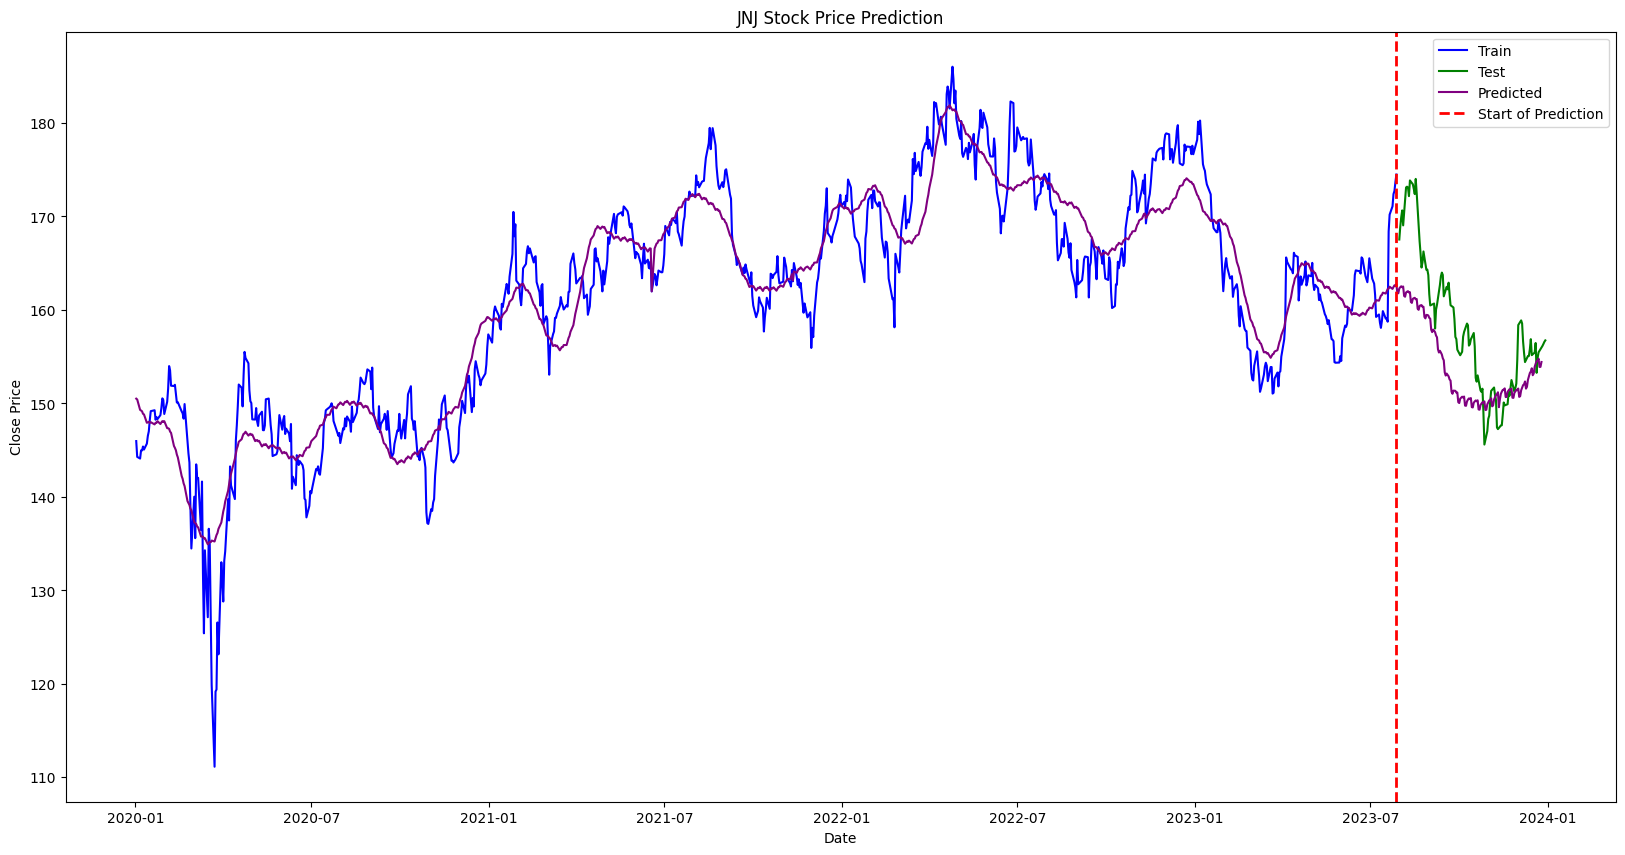

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(data_train['Date'], data_train['Close'], label='Train', color='blue')
plt.plot(data_test['Date'], data_test['Close'], label='Test', color='green')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='purple')

plt.axvline(x=data_train['Date'].max(), color='red', linestyle='--', linewidth=2, label='Start of Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('JNJ Stock Price Prediction')
plt.legend()
plt.show()
